In [166]:
import torch.nn as nn
import torchvision
import torch
import time

X=(1.,1.),(1.,0.),(0.,1.),(0.,0.)
Y=(1.,0.,0.,0.)
#logisches UND
X=torch.Tensor(X)
Y=torch.Tensor(Y)

In [167]:
net=nn.Sequential(
nn.Linear(2,1,bias=False)
)


In [168]:
losshist=[]
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
def plotter(lossdata):
    u=np.arange(len(lossdata))
    plt.plot(u,lossdata)
    plt.show()

<Figure size 432x288 with 0 Axes>

In [169]:
criterion = torch.nn.MSELoss()#Mittlerer quadratischer Fehler                 

epoch=0
optimizer = torch.optim.SGD(net.parameters(), lr = 0.1)


while True:
    y_pred = net(X)#model.predict --> Vorhersage des Modells der gesamten Epoche
    # loss wird anhand von criterion berechnet
    loss = criterion(y_pred,Y)
    
    losshist.append(loss.item())
    #plotter(losshist) für präsentation
    #for param in net.parameters():
    #     print('weights: ',param.data)
    if len(losshist)>2:
        print('losschange:',(losshist[epoch]-losshist[epoch-1]))
        if(losshist[epoch]-losshist[epoch-1])>=0:
            break
    #time.sleep(1) für präsentation
    
    optimizer.zero_grad()
    
    loss.backward()
    # Parameterupdate
    optimizer.step()
    epoch+=1

epoch:  0 Loss:  0.4311175048351288
epoch:  1 Loss:  0.37433189153671265
epoch:  2 Loss:  0.33281317353248596
losschange: -0.041518718004226685
epoch:  3 Loss:  0.30237266421318054
losschange: -0.03044050931930542
epoch:  4 Loss:  0.279979407787323
losschange: -0.022393256425857544
epoch:  5 Loss:  0.26343926787376404
losschange: -0.01654013991355896
epoch:  6 Loss:  0.25116318464279175
losschange: -0.01227608323097229
epoch:  7 Loss:  0.24199968576431274
losschange: -0.009163498878479004
epoch:  8 Loss:  0.23511368036270142
losschange: -0.006886005401611328
epoch:  9 Loss:  0.22989904880523682
losschange: -0.0052146315574646
epoch:  10 Loss:  0.2259153127670288
losschange: -0.003983736038208008
epoch:  11 Loss:  0.2228419929742813
losschange: -0.0030733197927474976
epoch:  12 Loss:  0.22044548392295837
losschange: -0.002396509051322937
epoch:  13 Loss:  0.21855510771274567
losschange: -0.0018903762102127075
epoch:  14 Loss:  0.21704590320587158
losschange: -0.0015092045068740845
epoch

In [170]:
z=net(X)

In [171]:
print(z*3)# deuten der daten, theoretisch ist jetzt alles kleiner gleich 0.502 = 0, die Funktion kann
          #natürlich nicht wie eine Transferfunktion alles auf 0 mappen

tensor([[1.0000],
        [0.5015],
        [0.4985],
        [0.0000]], grad_fn=<MulBackward0>)


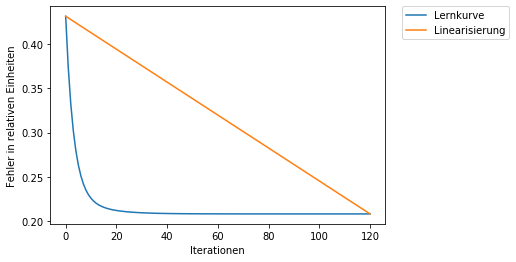

In [174]:
u=np.arange(len(losshist))
plt.plot(u,losshist,label='Lernkurve')
plt.plot((0,len(losshist)-1),(losshist[0],losshist[len(losshist)-1]),label='Linearisierung')
plt.xlabel('Iterationen')
plt.ylabel('Fehler in relativen Einheiten')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

c:\users\max\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


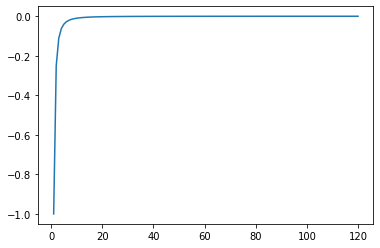

In [176]:
plt.plot(u,-(1/(u*u)))# Ableitung der Lernkurve (approximiert)